# Singular Regression Models

In [26]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [27]:
# Reading Housing Data File

data = pd.read_csv('Housing.csv')

data.head(5)

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
0,3.32105,0.0,19.58,Yes,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
1,1.12658,0.0,19.58,Yes,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
2,1.41385,0.0,19.58,Yes,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
3,3.53501,0.0,19.58,Yes,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
4,1.27346,0.0,19.58,Yes,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0


In [28]:
# Converting RIVER into non-categorical values

data['RIVER'] = data['RIVER'].map({'Yes': 1, 'No': 0})
data.head(5)

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
0,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
1,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
2,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
3,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
4,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0


In [29]:
# Selecting Depending Variable 'MEDV' 

# Dependent variable MEDV
y = data['MEDV']
y.head(5)

0    13.4
1    15.3
2    17.0
3    15.6
4    27.0
Name: MEDV, dtype: float64

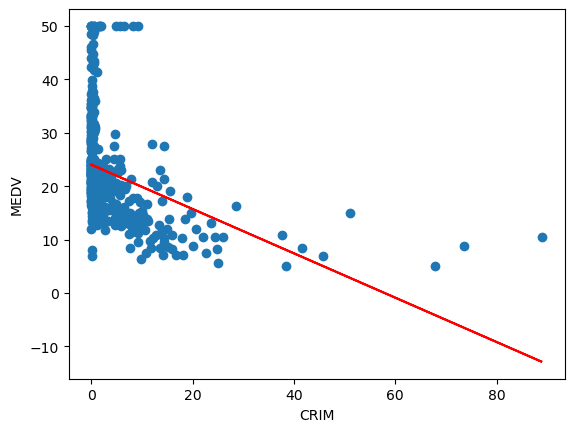

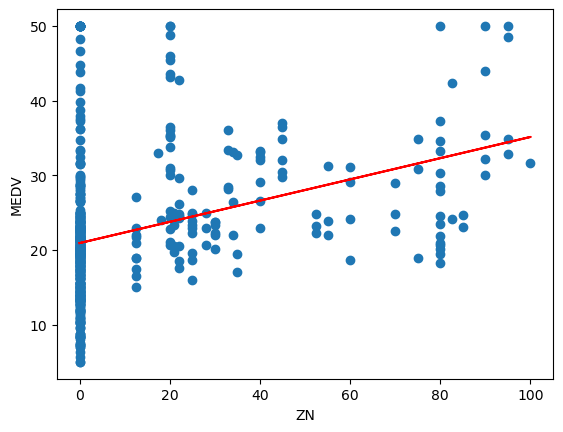

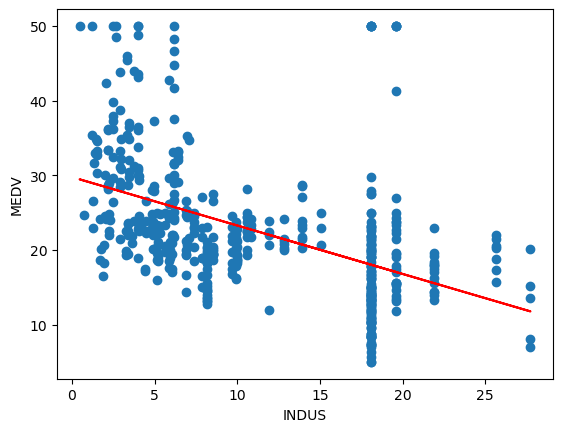

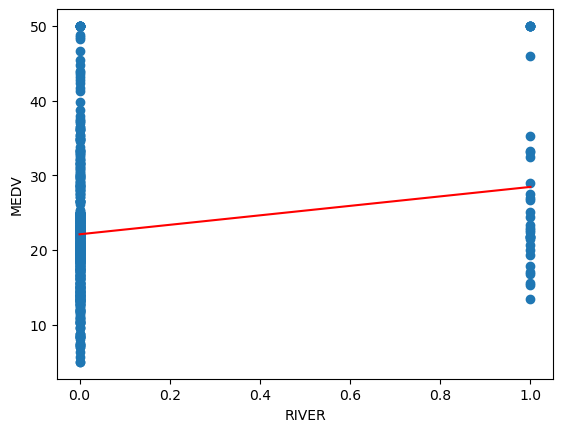

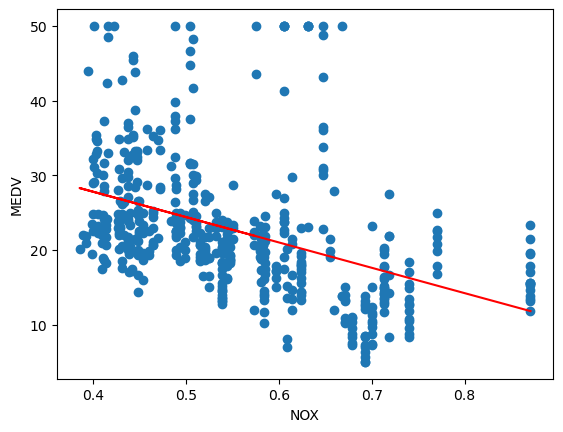

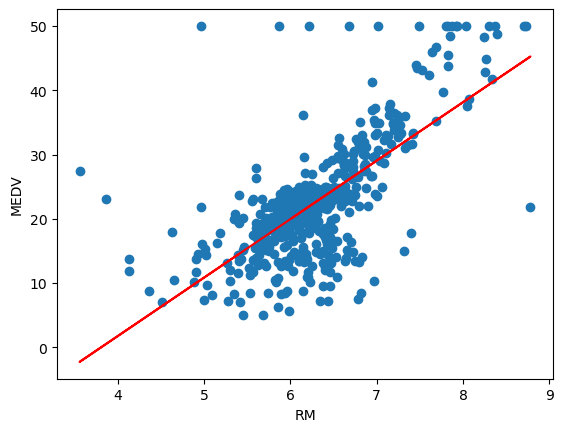

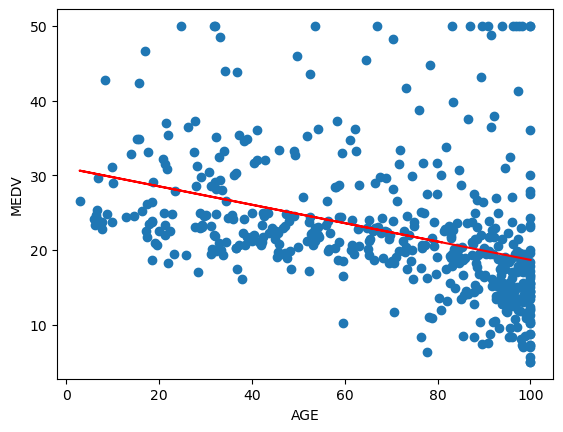

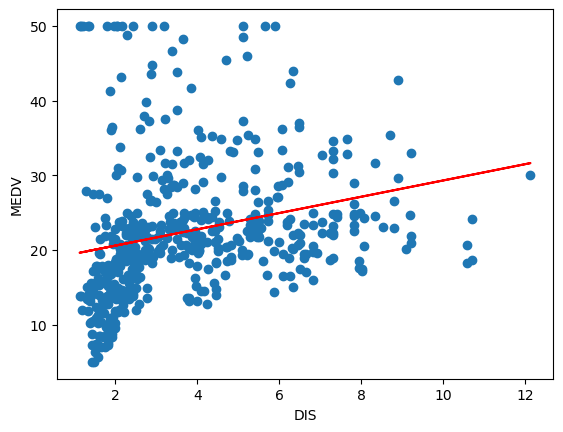

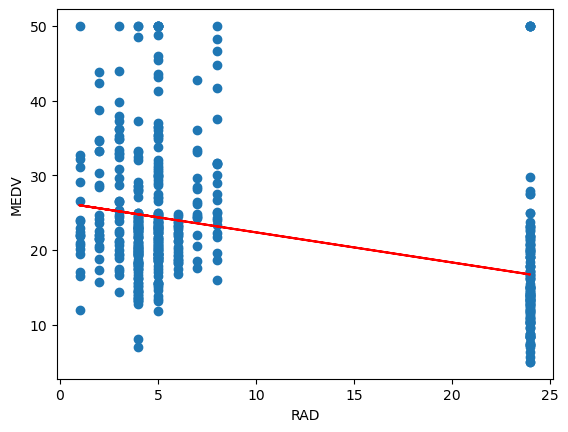

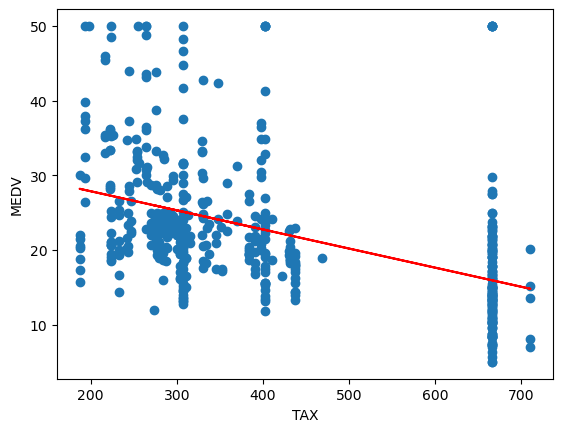

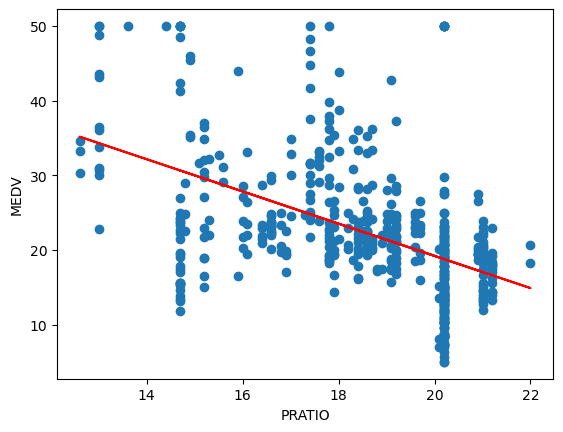

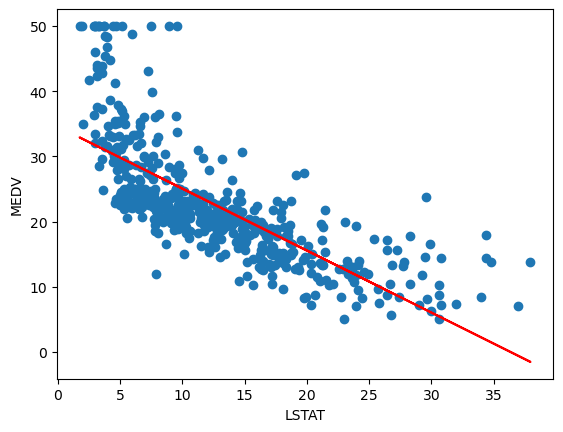

In [30]:
# Outputs the regression graphs for each variable

variables = ['CRIM', 'ZN', 'INDUS', 'RIVER', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'LSTAT']
x_label = 'MEDV'

for var in variables:
    x = data[var]
    y = data['MEDV']
    
    # Scatterplot with regression line
    plot_size = (10,6)
    plt.scatter(x, y)
    plt.xlabel(var)
    plt.ylabel(x_label)
    
    # Calculate regression line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red')
    
    plt.show()

NOX

In [31]:
# OLS Summary for selected variables

model = smf.ols(formula = 'MEDV ~ NOX', data = data)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           7.07e-24
Time:                        10:49:11   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3459      1.811     22.828      0.0

Calculating Predicted vs Actual using Equation 1

In [32]:
b = 41.3459
nox = -33.9161

for i in range(5):
    y_hat = b + (nox * data.loc[i,'NOX'])
    print('Predicted: ' + str(y_hat))
    print('Actual: ' + str(data.loc[i,'MEDV']))
    percentError = abs((y_hat - data.loc[i,'MEDV']) / data.loc[i,'MEDV'])
    print('Percent Error: ' + str(percentError * 100) + '\n')

Predicted: 11.8049769
Actual: 13.4
Percent Error: 11.903157462686572

Predicted: 11.8049769
Actual: 15.3
Percent Error: 22.843288235294125

Predicted: 11.8049769
Actual: 17.0
Percent Error: 30.558959411764707

Predicted: 11.8049769
Actual: 15.6
Percent Error: 24.327071153846152

Predicted: 20.8266595
Actual: 27.0
Percent Error: 22.86422407407407



RM

In [33]:
model = smf.ols(formula = 'MEDV ~ RM', data = data)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           2.49e-74
Time:                        10:49:11   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Calculating Predicted vs Actual using Equation 1

In [34]:
b = -34.6706
rm = 9.1021

for i in range(5):
    y_hat = b + (rm * data.loc[i,'RM'])
    print('Predicted: ' + str(y_hat))
    print('Actual: ' + str(data.loc[i,'MEDV']))
    percentError = abs((y_hat - data.loc[i,'MEDV']) / data.loc[i,'MEDV'])
    print('Percent Error: ' + str(percentError * 100) + '\n')

Predicted: 14.508046299999997
Actual: 13.4
Percent Error: 8.269002238805943

Predicted: 10.949125199999997
Actual: 15.3
Percent Error: 28.43709019607845

Predicted: 21.116170899999993
Actual: 17.0
Percent Error: 24.21276999999996

Predicted: 21.325519200000002
Actual: 15.6
Percent Error: 36.702046153846176

Predicted: 22.217525000000002
Actual: 27.0
Percent Error: 17.71287037037036



DIS

In [35]:
model = smf.ols(formula = 'MEDV ~ DIS', data = data)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        10:49:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

Calculating Predicted vs Actual using Equation 1

In [36]:
b = 18.3901
dis = 1.0916

for i in range(5):
    y_hat = b + (dis * data.loc[i,'DIS'])
    print('Predicted: ' + str(y_hat))
    print('Actual: ' + str(data.loc[i,'MEDV']))
    percentError = abs((y_hat - data.loc[i,'MEDV']) / data.loc[i,'MEDV'])
    print('Percent Error: ' + str(percentError * 100) + '\n')

Predicted: 19.832758560000002
Actual: 13.4
Percent Error: 48.005660895522404

Predicted: 20.14779432
Actual: 15.3
Percent Error: 31.68493019607842

Predicted: 20.29974504
Actual: 17.0
Percent Error: 19.41026494117648

Predicted: 20.2954878
Actual: 15.6
Percent Error: 30.099280769230774

Predicted: 20.35323344
Actual: 27.0
Percent Error: 24.617653925925925



LSTAT

In [37]:
model = smf.ols(formula = 'MEDV ~ LSTAT', data = data)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           5.08e-88
Time:                        10:49:11   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Calculating Predicted vs Actual using Equation 1

In [38]:
b = 34.5538
lstat = -0.9500

for i in range(5):
    y_hat = b + (lstat * data.loc[i,'LSTAT'])
    print('Predicted: ' + str(y_hat))
    print('Actual: ' + str(data.loc[i,'MEDV']))
    percentError = abs((y_hat - data.loc[i,'MEDV']) / data.loc[i,'MEDV'])
    print('Percent Error: ' + str(percentError * 100) + '\n')

Predicted: 9.074800000000003
Actual: 13.4
Percent Error: 32.277611940298485

Predicted: 23.039800000000003
Actual: 15.3
Percent Error: 50.58692810457518

Predicted: 20.189800000000005
Actual: 17.0
Percent Error: 18.763529411764736

Predicted: 20.284800000000004
Actual: 15.6
Percent Error: 30.03076923076926

Predicted: 29.3288
Actual: 27.0
Percent Error: 8.62518518518519



# Multiple Regression Models

In [39]:
# Verifying data
data.head(5)

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
0,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
1,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
2,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
3,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
4,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0


First Regression Model (Fig. 2)

In [40]:
regressionModel = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + RIVER + NOX + RM + AGE + DIS + RAD + TAX + PRATIO + LSTAT', data = data)
regressionResult = regressionModel.fit()
print(regressionResult.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          2.23e-133
Time:                        10:49:11   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

Calculating Predicted vs Actual using Equation 2

In [ ]:
# Actual vs Predicted Comparison

# List to store data temporarily
results = []

b = 41.6173

crim = -0.1214
zn = 0.0470
indus = 0.0135
river = 2.8400
nox = -18.7580
rm = 3.6581
age = 0.0036
dis = -1.4908
rad = 0.2894
tax = -0.0127
pratio = -0.9375
lstat = -0.5520

for i in range(len(data['MEDV'])):
    y_hat = (b
        + (crim * data.loc[i, 'CRIM']) + (zn * data.loc[i, 'ZN']) + (indus * data.loc[i, 'INDUS']) 
        + (river * data.loc[i, 'RIVER'])
        + (nox * data.loc[i, 'NOX'])
        + (rm * data.loc[i, 'RM'])
        + (age * data.loc[i, 'AGE'])
        + (dis * data.loc[i, 'DIS'])
        + (rad * data.loc[i, 'RAD'])
        + (tax * data.loc[i, 'TAX'])
        + (pratio * data.loc[i, 'PRATIO'])
        + (lstat * data.loc[i, 'LSTAT'])
    )
    actual = data.loc[i, 'MEDV']
    percent_error = abs((y_hat - actual) / actual) * 100
    
    # Append results
    results.append({
        'Actual': actual,
        'Predicted': y_hat,
        'Percent Error': percent_error
    })

# Convert results list to DataFrame
comparison = pd.DataFrame(results)

# Prints Dataframe
print(comparison)

print('Average Percent Error: ' + str(np.mean(comparison['Percent Error'])))
print('Min Percent Error: ' + str(min(comparison['Percent Error'])) + '\tMax Percent Error: ' + str(max(comparison['Percent Error'])))

     Actual  Predicted  Percent Error
0      13.4  13.877720       3.565071
1      15.3  20.354766      33.037688
2      17.0  22.571270      32.772176
3      15.6  22.410672      43.658151
4      27.0  33.245522      23.131564
..      ...        ...            ...
501    22.4  23.490894       4.870063
502    20.6  22.400652       8.741030
503    23.9  27.659361      15.729545
504    22.0  26.187796      19.035437
505    11.9  22.424074      88.437600

[506 rows x 3 columns]
Average Percent Error: 16.921129504962323
Min Percent Error: 0.0016883005780605254	Max Percent Error: 144.79101714285716


Fig. 3 (Model w/o AGE, INDUS, ZN)

In [42]:
regressionModel = smf.ols(formula = 'MEDV ~ CRIM + RIVER + NOX + RM + DIS + RAD + TAX + PRATIO + LSTAT', data = data)
regressionResult = regressionModel.fit()
print(regressionResult.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          3.77e-134
Time:                        10:49:11   Log-Likelihood:                -1510.7
No. Observations:                 506   AIC:                             3041.
Df Residuals:                     496   BIC:                             3084.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.1861      4.950      8.523      0.0

Calculating Predicted vs Actual using Equation 2

In [43]:
# Initialize an empty list to store results
results = []

b = 42.1861

crim = -0.1115
river = 2.8660
nox = -19.5345
rm = 3.8750
dis = -1.1989
rad = 0.2685
tax = -0.0100
pratio = -1.0820
lstat = -0.5460

for i in range(len(data['MEDV'])):
    y_hat = (b
        + (crim * data.loc[i, 'CRIM'])
        + (river * data.loc[i, 'RIVER'])
        + (nox * data.loc[i, 'NOX'])
        + (rm * data.loc[i, 'RM'])
        + (dis * data.loc[i, 'DIS'])
        + (rad * data.loc[i, 'RAD'])
        + (tax * data.loc[i, 'TAX'])
        + (pratio * data.loc[i, 'PRATIO'])
        + (lstat * data.loc[i, 'LSTAT'])
    )
    actual = data.loc[i, 'MEDV']
    percent_error = abs((y_hat - actual) / actual) * 100
    
    # Append results
    results.append({
        'Actual': actual,
        'Predicted': y_hat,
        'Percent Error': percent_error
    })

# Convert results list to DataFrame
comparison = pd.DataFrame(results)

# Display the DataFrame
print(comparison)

print('Average Percent Error: ' + str(np.mean(comparison['Percent Error'])))
print('Min Percent Error: ' + str(min(comparison['Percent Error'])) + '\tMax Percent Error: ' + str(max(comparison['Percent Error'])))

     Actual  Predicted  Percent Error
0      13.4  13.782792       2.856658
1      15.3  20.192548      31.977438
2      17.0  22.684006      33.435327
3      15.6  22.595897      44.845493
4      27.0  33.558485      24.290685
..      ...        ...            ...
501    22.4  23.098810       3.119686
502    20.6  21.819120       5.918059
503    23.9  27.156501      13.625527
504    22.0  25.721730      16.916955
505    11.9  21.864571      83.735889

[506 rows x 3 columns]
Average Percent Error: 17.283160595072093
Min Percent Error: 0.0011005416666678672	Max Percent Error: 145.60528042857135
